#**Ripik.AI HackFest: Unleashing AI Potential**

**Dataset Description:**

The dataset consists of car images with various types of damages commonly encountered in insurance claims. Each image is labeled with a specific type of damage, such as cracks, scratches, flat tires, dents, shattered glass, and broken lamps. The goal is to develop a computer vision model that can automatically classify these images, aiding insurance companies in identifying and preventing exaggerated or false claims. The training set, provided in the `train.zip` file, contains images in the 'images' folder and is accompanied by a 'train.csv' file with columns specifying image_id, filename, and corresponding damage labels.

Additionally, a test set is provided in the 'test.zip' file for evaluating the model's performance. The test set contains images to predict.

**Objective:**

Develop a robust image classification model using DenseNet201 for accurately identifying and categorizing car damages. Achieve high precision, recall, and F1-score to enhance the efficiency of insurance claim processing.


**Interpretation:**

The model achieved a high accuracy of 96.25%, demonstrating its effectiveness in classifying car damage types. Precision, recall, and F1-score metrics indicate strong performance across most damage categories. There's potential for improvement in precision for the "lamp broken" category. Overall, the model holds promise for automating and improving the accuracy of insurance claim assessments.

In [1]:
#Importing the required libraries
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Ripik Hackathon Dataset/train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')

In [4]:
#Loading the training dataset
train_df = pd.read_csv('/content/train/train/train.csv')

In [5]:
#Converting the 'label' column to strings
train_df['label'] = train_df['label'].astype(str)

In [6]:
#Data Preprocessing
image_size = (224, 224)
batch_size = 16

In [7]:
#Splitting the dataset into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [8]:
#Creating ImageDataGenerators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory='/content/train/train/images',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory='/content/train/train/images',
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5760 validated image filenames belonging to 6 classes.
Found 1440 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


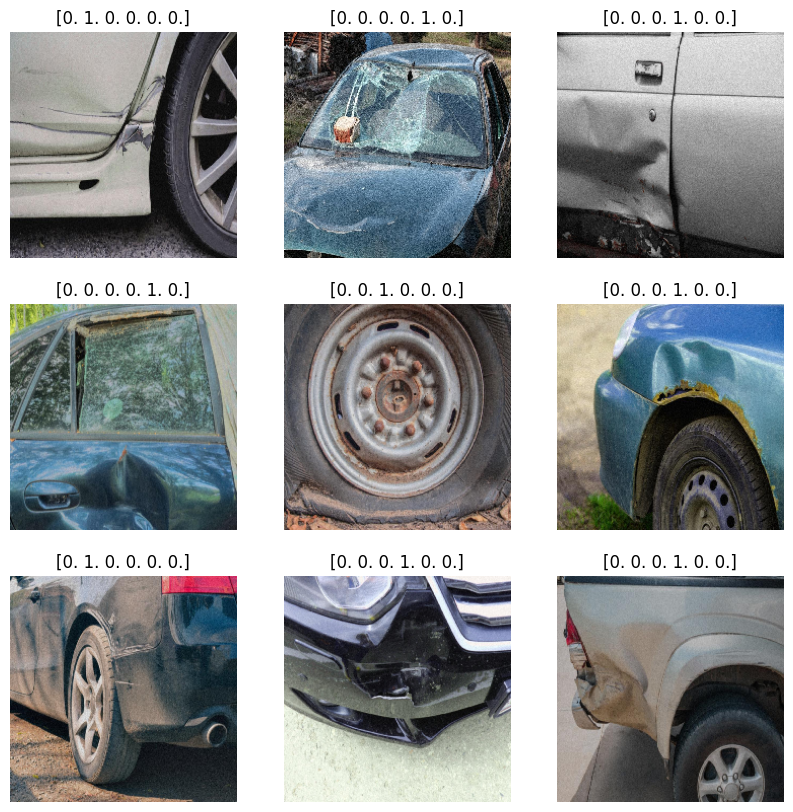

In [9]:
# Generate augmented images and labels
images, labels = val_generator.next()
#Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [10]:
#Loading the DenseNet201 model pre-trained on ImageNet data
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#Freeze the pre-trained layers
for layer in base_model.layers[-20:]:
    layer.trainable = False
#Building the model
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#Display the model summary
model.summary()

74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 18445318 (70.36 MB)
Trainable params: 17614

In [12]:
#Model training
history=model.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
360/360 [==============================] - 281s 431ms/step - loss: 0.8537 - accuracy: 0.6776 - val_loss: 0.4489 - val_accuracy: 0.8361
Epoch 2/20
360/360 [==============================] - 150s 416ms/step - loss: 0.4553 - accuracy: 0.8457 - val_loss: 0.3835 - val_accuracy: 0.8729
Epoch 3/20
360/360 [==============================] - 148s 412ms/step - loss: 0.2990 - accuracy: 0.8998 - val_loss: 0.3491 - val_accuracy: 0.8799
Epoch 4/20
360/360 [==============================] - 149s 415ms/step - loss: 0.2061 - accuracy: 0.9349 - val_loss: 0.2489 - val_accuracy: 0.9167
Epoch 5/20
360/360 [==============================] - 149s 413ms/step - loss: 0.1944 - accuracy: 0.9411 - val_loss: 0.1791 - val_accuracy: 0.9424
Epoch 6/20
360/360 [==============================] - 148s 411ms/step - loss: 0.1329 - accuracy: 0.9587 - val_loss: 0.1849 - val_accuracy: 0.9424
Epoch 7/20
360/360 [==============================] - 151s 420ms/step - loss: 0.1435 - accuracy: 0.9592 - val_loss: 0.1406 -

In [13]:
predictions=model.predict(val_generator)
y_true=val_generator.classes
#Convert predictions to class labels
y_pred=np.argmax(predictions,axis=1)
accuracy=accuracy_score(y_true,y_pred)
class_report=classification_report(y_true,y_pred)
print("Classification Report:")
print(class_report)
print("\nAccuracy Score:")
print(accuracy)

90/90 [==============================] - 14s 126ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.99      0.92      0.96       473
           2       0.97      1.00      0.99       114
           3       0.94      0.96      0.95       403
           4       0.99      1.00      1.00       244
           5       0.90      1.00      0.95       179

    accuracy                           0.96      1440
   macro avg       0.97      0.98      0.97      1440
weighted avg       0.96      0.96      0.96      1440


Accuracy Score:
0.9625


In [14]:
#Loading the test zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Ripik Hackathon Dataset/test.zip', 'r') as zip_ref:
    zip_ref.extractall('test')

In [19]:
#Loading the testing dataset
test_df = pd.read_csv('/content/test/test/test.csv')
#Create a data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col=None,
    directory='/content/test/test/images',
    target_size=(224, 224),
    batch_size=128,
    class_mode=None,
    shuffle=False
)
#Making predictions for the test set
predictions = model.predict(test_generator)
#Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1).numpy() + 1
#Creating a submission DataFrame
submission_df = pd.DataFrame({'image_id': test_df['image_id'], 'label': predicted_labels})
#Saving the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

Found 4800 validated image filenames.
38/38 [==============================] - 42s 1s/step
